<a href="https://colab.research.google.com/github/WandersonGustavo/Imersao_Alura/blob/main/DataScience3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MACHINE LEARNING 11/01

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB #ultilizar naive bayse
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix , accuracy_score
from yellowbrick.classifier import ConfusionMatrix #forma da matrix em grafico

In [ ]:
credito=pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [ ]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
previsores=credito.iloc[:,0:20].values
classe=credito.iloc[:,20].values

In [ ]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica
# Precisamos criar um objeto para cada atributo categórico, pois na sequência vamos executar o processo de encoding novamente para o registro de teste
# Se forem utilizados objetos diferentes, o número atribuído a cada valor poderá ser diferente, o que deixará o teste inconsistente
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])


In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [ ]:
 #Criação e treinamento do modelo (geração da tabela de probabilidades)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [ ]:
# Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [ ]:
#geração da matriz de confusão e cálculo da taxa de acerto e erro
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 41,  45],
       [ 42, 172]])

In [ ]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.71

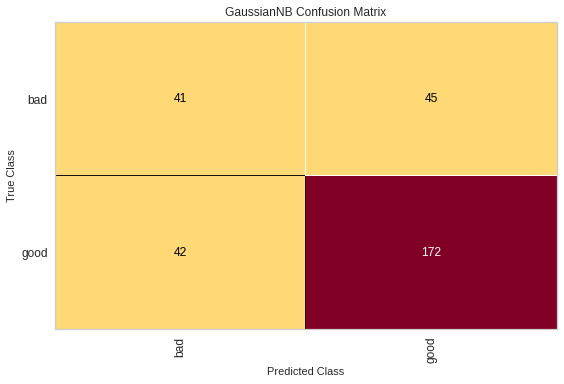

In [ ]:
# Visualização da matriz de confusão
# Warning interno da biblioteca yellowbrick, já esta na última versão (sem solução para o warning no momento)
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [ ]:
# Previsão com novo registro, transformando os atributos categóricos em numéricos
novo_credito = pd.read_csv('NovoCredit.csv')
novo_credito.shape
#novo_credito

(1, 20)

In [ ]:
'''previsores=novo_credito.iloc[:,0:20].values #pegandos os previsores da classe
classe=novo_credito.iloc[:,20].values #classe em registro diferente'''

In [ ]:
# Usamos o mesmo objeto que foi criado antes, para manter o padrão dos dados
# Chamamos somente o método "transform", pois a adaptação aos dados (fit) já foi feita anteriormente
#novo_credito = novo_credito.iloc[:,0:20].values
novo_credito[:,0] = labelEncoder1.transform(novo_credito[:,0])
novo_credito[:, 2] = labelEncoder2.transform(novo_credito[:, 2])
novo_credito[:, 3] = labelEncoder3.transform(novo_credito[:, 3])
novo_credito[:, 5] = labelEncoder4.transform(novo_credito[:, 5])
novo_credito[:, 6] = labelEncoder5.transform(novo_credito[:, 6])
novo_credito[:, 8] = labelEncoder6.transform(novo_credito[:, 8])
novo_credito[:, 9] = labelEncoder7.transform(novo_credito[:, 9])
novo_credito[:, 11] = labelEncoder8.transform(novo_credito[:, 11])
novo_credito[:, 13] = labelEncoder9.transform(novo_credito[:, 13])
novo_credito[:, 14] = labelEncoder10.transform(novo_credito[:, 14])
novo_credito[:, 16] = labelEncoder11.transform(novo_credito[:, 16])
novo_credito[:, 18] = labelEncoder12.transform(novo_credito[:, 18])
novo_credito[:, 19] = labelEncoder13.transform(novo_credito[:, 19])

In [ ]:
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')

In [ ]:
#arvore de decisao 12/01

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB #ultilizar naive bayse
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix , accuracy_score
from yellowbrick.classifier import ConfusionMatrix #forma da matrix em grafico
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

In [ ]:
credito=pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [ ]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
previsores=credito.iloc[:,0:20].values
classe=credito.iloc[:,20].values

In [ ]:
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamentoA, X_teste, y_treinamentoA, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

array([[1, 15, 0, ..., 2, 1, 1],
       [2, 36, 3, ..., 1, 0, 1],
       [0, 12, 4, ..., 1, 0, 1],
       ...,
       [1, 15, 1, ..., 1, 1, 1],
       [1, 24, 3, ..., 1, 0, 1],
       [1, 9, 1, ..., 2, 0, 1]], dtype=object)

In [ ]:

#modelo de treino com tree
arv=DecisionTreeClassifier()
arv.fit(X_treinamentoA,y_treinamentoA)

DecisionTreeClassifier()

In [ ]:
#exportacao da arv em .dot pra vizualizar
export_graphviz(arv, out_file='tree.dot')

In [ ]:
#previsoes
previsoe=arv.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [ ]:
#taxa de acerto
taxa_acerto2=accuracy_score(y_teste,previsoes)
taxa_acerto2

0.71

In [ ]:
#erro
taxa_erro=1- taxa_acerto2
taxa_erro

0.29000000000000004

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB #ultilizar naive bayse
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix , accuracy_score
from yellowbrick.classifier import ConfusionMatrix #forma da matrix em grafico
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC


In [28]:
credito=pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [36]:
pvs=credito.iloc[:,0:20].values
classe=credito.iloc[:,20].values

In [37]:
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

In [38]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treino, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 1)
X_teste

array([[1, 15, 0, ..., 2, 1, 1],
       [2, 36, 3, ..., 1, 0, 1],
       [0, 12, 4, ..., 1, 0, 1],
       ...,
       [1, 15, 1, ..., 1, 1, 1],
       [1, 24, 3, ..., 1, 0, 1],
       [1, 9, 1, ..., 2, 0, 1]], dtype=object)

In [39]:
#criacao do modelo de treinamento com vetor de suporte
svm=SVC()
svm.fit(X_treino,y_treinamento)

SVC()

In [42]:
#previsoes de treino
previsores=svm.predict(X_treino)
previsores

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'g

In [ ]:
'''taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto'''

In [45]:
forest= ExtraTreesClassifier()
forest.fit(X_treino, y_treinamento)
importancias= forest.feature_importances_
importancias

array([0.10279421, 0.0803875 , 0.0670761 , 0.0611044 , 0.0816487 ,
       0.05487028, 0.04996379, 0.05453965, 0.04344835, 0.02842405,
       0.04816835, 0.0462817 , 0.07072119, 0.0423491 , 0.03476832,
       0.03418078, 0.04014703, 0.02168586, 0.03124591, 0.00619471])

In [ ]:
X_treino=X_treino[:[0,1,2,3]]
X_teste

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix , accuracy_score
from scipy import stats
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [48]:
iristemp=pd.read_csv('iris.csv')
iristemp.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
iris=datasets.load_iris()
stats.describe(iris.data)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [53]:
#organizou em nums as classe
#iris.data
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
#indep é previsoreN , dep é a classe
previsoesN=iris.data 
classe=iris.target

In [56]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treino2, X_teste2, y_treino2, y_teste2 = train_test_split(previsoesN,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 1)
len(X_teste2)

45

In [57]:
#mtd pra metodo olhar qntos vizinhos + proximos vai relacionar no modelo
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_treino2,y_treino2)

KNeighborsClassifier(n_neighbors=3)

In [58]:
#45 previsoes dos registros
previsoesN=knn.predict(X_teste2)
previsoesN

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [59]:
#matrix com o y_teste e previsoes #diag principal sao os acertos , houve 1 erro
confusaoN=confusion_matrix(y_teste2,previsoesN)
confusaoN

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]])

In [61]:
#taxas de acerto e erro
taxa_acertoN = accuracy_score(y_teste2, previsoesN)
taxa_erroN = 1 - taxa_acertoN
taxa_acertoN

0.9777777777777777

In [ ]:
#ensamble learning com random forest
#gera varios modelos(trees conforme parametro definido) variando em termo de config , pra ver qual melhor votando pela performance

In [62]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [63]:
creditorf = pd.read_csv('Credit.csv')
creditorf.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [65]:
previsoresrf = creditorf.iloc[:,0:20].values
classerf = creditorf.iloc[:,20].values

In [66]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada atributo categórico
labelencoder = LabelEncoder()
previsoresrf[:,0] = labelencoder.fit_transform(previsoresrf[:,0])
previsoresrf[:,2] = labelencoder.fit_transform(previsoresrf[:,2])
previsoresrf[:, 3] = labelencoder.fit_transform(previsoresrf[:, 3])
previsoresrf[:, 5] = labelencoder.fit_transform(previsoresrf[:, 5])
previsoresrf[:, 6] = labelencoder.fit_transform(previsoresrf[:, 6])
previsoresrf[:, 8] = labelencoder.fit_transform(previsoresrf[:, 8])
previsoresrf[:, 9] = labelencoder.fit_transform(previsoresrf[:, 9])
previsoresrf[:, 11] = labelencoder.fit_transform(previsoresrf[:, 11])
previsoresrf[:, 13] = labelencoder.fit_transform(previsoresrf[:, 13])
previsoresrf[:, 14] = labelencoder.fit_transform(previsoresrf[:, 14])
previsoresrf[:, 16] = labelencoder.fit_transform(previsoresrf[:, 16])
previsoresrf[:, 18] = labelencoder.fit_transform(previsoresrf[:, 18])
previsoresrf[:, 19] = labelencoder.fit_transform(previsoresrf[:, 19])

In [67]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinorf, X_testerf, y_treinorf, y_testerf = train_test_split(previsoresrf,
                                                                  classerf,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [69]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto,n_estimators num de arv aleatorias criadas
floresta = RandomForestClassifier(n_estimators = 20)
floresta.fit(X_treinorf, y_treinorf)

RandomForestClassifier(n_estimators=50)

In [71]:
# Visualização dos atributos principais,ver tds as variacoes geradas
floresta.estimators_
#floresta.estimators_[1]

[DecisionTreeClassifier(max_features='auto', random_state=1661209425),
 DecisionTreeClassifier(max_features='auto', random_state=51720974),
 DecisionTreeClassifier(max_features='auto', random_state=698629682),
 DecisionTreeClassifier(max_features='auto', random_state=1254391408),
 DecisionTreeClassifier(max_features='auto', random_state=585904218),
 DecisionTreeClassifier(max_features='auto', random_state=1396742071),
 DecisionTreeClassifier(max_features='auto', random_state=296186212),
 DecisionTreeClassifier(max_features='auto', random_state=1650825386),
 DecisionTreeClassifier(max_features='auto', random_state=1591366532),
 DecisionTreeClassifier(max_features='auto', random_state=58187894),
 DecisionTreeClassifier(max_features='auto', random_state=616070370),
 DecisionTreeClassifier(max_features='auto', random_state=3419731),
 DecisionTreeClassifier(max_features='auto', random_state=2036027058),
 DecisionTreeClassifier(max_features='auto', random_state=1877483932),
 DecisionTreeClas

In [72]:
previsoesrf = floresta.predict(X_testerf)
confusao = confusion_matrix(y_testerf, previsoesrf)
taxa_acertorf = accuracy_score(y_testerf, previsoesrf)
taxa_acertorf

0.7666666666666667

In [ ]:
#kmeans usa distancia euclidiana para agrupar usuarios , atraves de num de clusters previamente definido

In [73]:
# Importação das bibliotecas
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [74]:
# Carregamento da base de dados 
iris = datasets.load_iris()
# visualização de quantos registros existem por classe,tarefa ñ supervisionada
unicosk, quantidadek = np.unique(iris.target, return_counts = True) #conta qtd de registros na classe
unicosk

array([0, 1, 2])

In [75]:
quantidadek

array([50, 50, 50])

In [76]:
# Agrupamento com k-means, utilizando 3 clusters (de acordo com a base de dados),define aq o num de clusters
cluster = KMeans(n_clusters = 3)
cluster.fit(iris.data) #ñ usa target

KMeans(n_clusters=3)

In [77]:
# Visualização dos três centroides
centroides = cluster.cluster_centers_
centroides

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [78]:
# Visualização dos grupos que cada registro foi associado,ñ é previsao é agrupamento
previsoesk = cluster.labels_
previsoesk

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [79]:
# Contagem dos registros por classe
unicosk2, quantidadek2 = np.unique(previsoesk, return_counts = True)
unicosk2

array([0, 1, 2], dtype=int32)

In [81]:
quantidadek2 #mudou agrupamento , ñ coincndo com classes reais

array([62, 50, 38])

In [82]:
# Geração da matriz de contingência para comparar os grupos com a base de dados
resultadosk = confusion_matrix(iris.target, previsoesk)
resultadosk

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

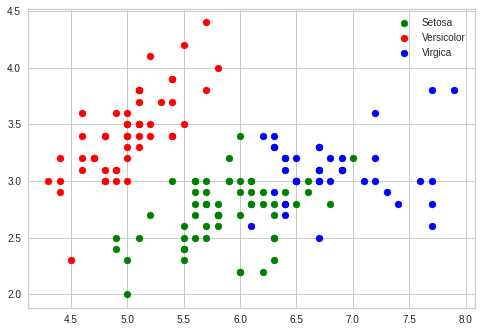

In [83]:
# Geração do gráfico com os clusters gerados, considerando para um (previsoes 0, 1 ou 2)
# Usamos somente as colunas 0 e 1 da base de dados original para termos 2 dimensões
plt.scatter(iris.data[previsoesk == 0, 0], iris.data[previsoesk == 0, 1], 
            c = 'green', label = 'Setosa')
plt.scatter(iris.data[previsoesk == 1, 0], iris.data[previsoesk == 1, 1], 
            c = 'red', label = 'Versicolor')
plt.scatter(iris.data[previsoesk == 2, 0], iris.data[previsoesk == 2, 1], 
            c = 'blue', label = 'Virgica')
plt.legend()